# NetworkX 
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.It is used to study large complex networks represented in form of graphs with nodes and edges. Using networkx we can load and store complex networks.

## Creating a graph


In [1]:
# To install network
pip install networkx[default]

SyntaxError: invalid syntax (Temp/ipykernel_11136/675343671.py, line 2)

### A Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc).
A graph (network) is a collection of nodes together with a collection of edges that are pairs of nodes. Attributes are often associated with nodes and/or edges. 

<span style="color:red">
    The following basic graph types are provided as Python classes:
    
       1) Graph: This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.
        2) DiGraph: Directed graphs, that is, graphs with directed edges. Provides operations common to  directed graphs, (a subclass of Graph).
       3) MultiGraph:A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.
        4) MultiDiGraph:A directed version of a MultiGraph.
</span>

####  All graph classes allow any hashable object as a node. Hashable objects include strings, tuples, integers,an XML object, another Graph,a customized node object, etc. and more. Arbitrary edge attributes such as weights and labels can be associated with an edge.
Note:
A hashable object is one that can be used as a key in a Python dictionary. This includes strings, numbers, tuples of strings and numbers, etc.
On many platforms hashable items also include mutables such as NetworkX Graphs, though one should be careful that the hash doesn’t change on mutables.


In [2]:
# import the networkx module
import networkx as nx

In [5]:
#Empty graph-like objects are created with
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

In [6]:
#1.   Create an empty graph with no nodes and no edges.
import networkx as nx
G = nx.Graph()

## Nodes
The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats.You can add one node at a time,

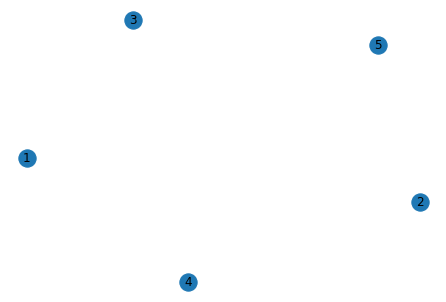

In [11]:
G.add_node(1) #to create a node 
G.add_nodes_from([2, 3,4,5]) #using list
nx.draw(G, with_labels = True) #Will assign random locations of the nodes

## Edges

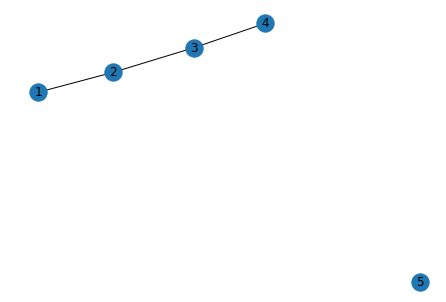

In [19]:
#G can be grown by adding one edge at a time,
G.add_edge(1, 2)
G.add_edge(3,4)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
nx.draw(G, with_labels = True)

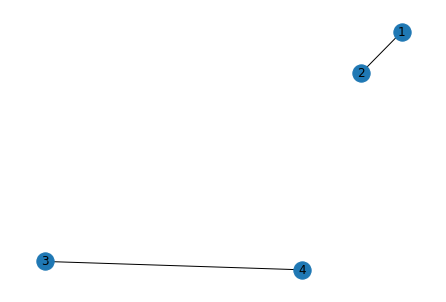

In [21]:
#G can be grown by adding a list of edges,
G = nx.Graph()
G.add_edges_from([(1, 2), (4, 3)])
nx.draw(G, with_labels = True)

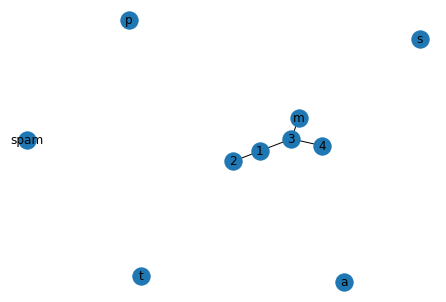

In [8]:
#we add new nodes/edges and NetworkX quietly ignores any that are already present.
G.add_edges_from([(1, 2), (1, 3)])
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spammt")  
G.add_edge(3, 'm')  # No m node will be added in the network
nx.draw(G, with_labels = True)

In [9]:
#To see number of nodes
G.number_of_nodes()

10

In [10]:
# To see number of edges
G.number_of_edges()

4

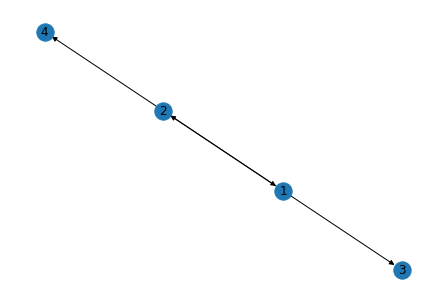

In [25]:
#The order of adjacency reporting (e.g., G.adj, G.successors, G.predecessors) is the order 
#of edge addition. However, the order of G.edges is the order of the adjacencies which includes
#both the order of the nodes and each node’s adjacencies. 

DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)  #first node is the starting point of the direction
DG.add_edge(1, 2)
#assert list(DG.successors(2)) == [1, 4]  # you can pass this as a condition 
#assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]
nx.draw(DG, with_labels = True)

## Four basic graph properties facilitate reporting:
    G.nodes
    G.edges
    G.adj and
    G.degree.
These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in
a graph. They offer a continually updated read-only view into the graph structure. 

In [13]:
list(G.nodes)


[1, 2, 4, 3, 'spam', 's', 'p', 'a', 'm', 't']

In [26]:
list(G.edges)

[(1, 2), (4, 3)]

In [16]:
#list(G.adj['m']) 
list(G.neighbors(1))

[2, 3]

In [17]:
G.degree['p']  # the number of edges incident to 1

0

####  To report the edges and degree from a subset of all nodes using an nbunch. An nbunch is any of: None (meaning all nodes), a node, or an iterable container of nodes that is not itself a node in the graph.

In [22]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [24]:
G.degree([2, 3])

DegreeView({2: 1, 3: 3})

####  Removing elements from a graph
        One can remove nodes and edges from the graph in a similar fashion to adding. Use methods Graph.remove_node()
    Graph.remove_nodes_from()
    Graph.remove_edge() 
    Graph.remove_edges_from()

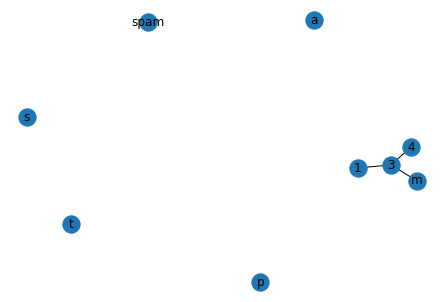

In [25]:
G.remove_node(2)
nx.draw(G,with_labels=True)

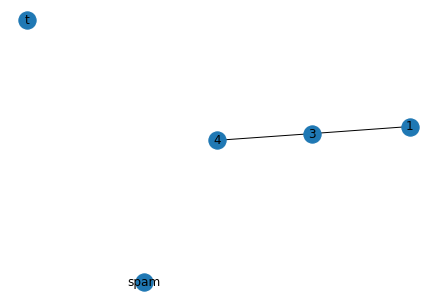

In [26]:
G.remove_nodes_from("spam") #emove all nodes created from spam list
list(G.nodes)
nx.draw(G,with_labels=True)

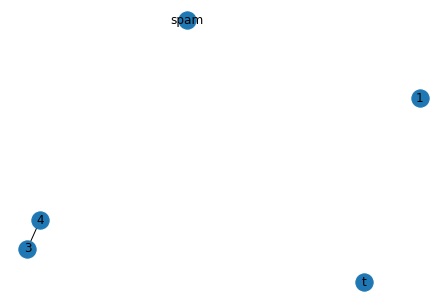

In [27]:
G.remove_edge(1, 3)
nx.draw(G,with_labels=True)

### Using the graph constructors
Graph objects do not have to be built up incrementally - data specifying graph structure can be passed directly to the constructors of the various graph classes. When creating a graph structure by instantiating one of the graph classes you can specify data in several formats.

[(1, 2), (4, 3), (3, 4), (2, 1)]


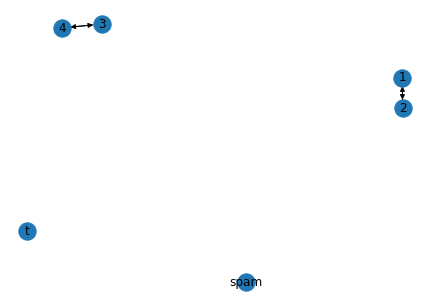

In [29]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print(list(H.edges()))   #to return list of edges
nx.draw(H,with_labels=True)

[(0, 1), (1, 2), (2, 3)]


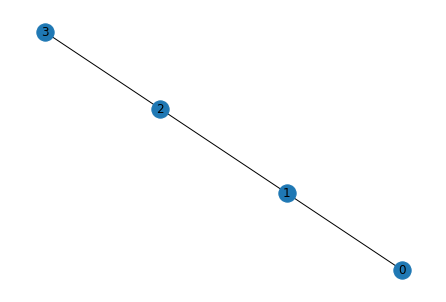

In [31]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
print(list(H.edges()))
nx.draw(H,with_labels=True)

{'color': 'yellow'}
{'color': 'red'}


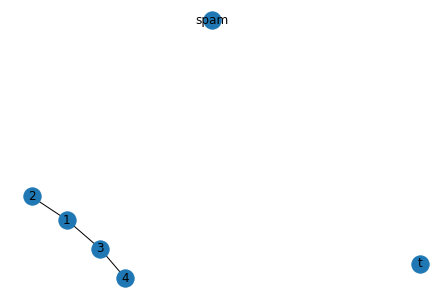

In [35]:
#adding only attributes to the edge and not changing the colors of the edges
G.add_edge(1, 3)
G[1][3]['color'] = "yellow"
print(G.edges[1, 3])
G.edges[1, 2]['color'] = "red"
print(G.edges[1, 2])
nx.draw(G, with_labels = True)

{2: {'color': 'y'}}


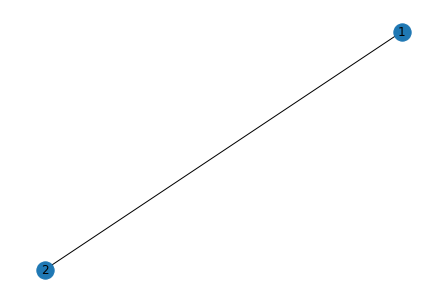

In [37]:
G = nx.Graph([(1, 2, {"color": 'y'})]) #1 vali node ke corrspndng attrbutes are getting added
print(G[1])  # same as G.adj[1]
nx.draw(G, with_labels = True)

Fast examination of all (node, adjacency) pairs is achieved using 
    G.adjacency()
or G.adj.items().
Note that for undirected graphs, adjacency iteration sees each edge twice.

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


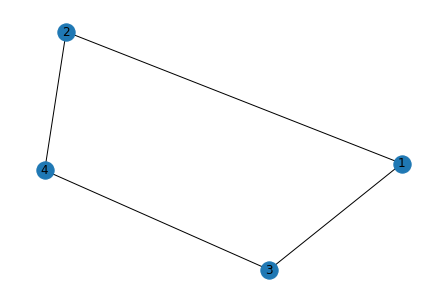

In [38]:
FG = nx.Graph()
pos = nx.spring_layout(FG) 
#spring_layout takes a weight-keyword which is the name of the edge attribute to use as weight when applying the layout.
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items(): #n goes from 1,2,3,4 and nbr uska neighbour hai
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

nx.draw(FG,with_labels=True)
#nx.draw_networkx_edge_labels(FG, pos,edge_labels={('1', '2'): 'AB',('1', '3'): 'BC',('2','4'):'1.2',('3','4'):'0.375'})#,font_color='red')

### Graph attributes
Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary
(the keys must be hashable). By default these are empty, but attributes can be added or changed
using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.nodes,
and G.edges for a graph G.


In [39]:
#Assign graph attributes when creating a new graph
G = nx.Graph(day="Friday")
G.graph


{'day': 'Friday'}

In [ ]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

###  Node attributes
Add node attributes using
    add_node()
    add_nodes_from()
    G.nodes
    
    Note that adding a node to G.nodes does not add it to the graph, use G.add_node() to add new nodes. Similarly for edges.

[(1, {'time': '5 PM', 'room': 714}), (3, {'time': '2pm'})]


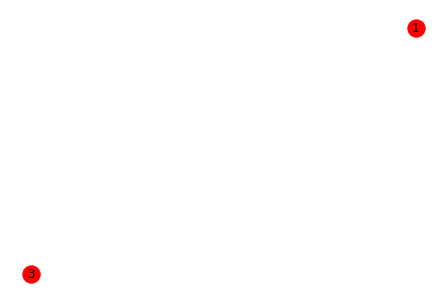

In [ ]:
import networkx as nx
G1 = nx.Graph()
G1.add_node(1, time='5 PM')
G1.add_nodes_from([3], time='2pm')
G1.nodes[1]['room'] = 714 #append hogaya
print(G1.nodes.data())
nx.draw(G1,with_labels=True,node_color='r')

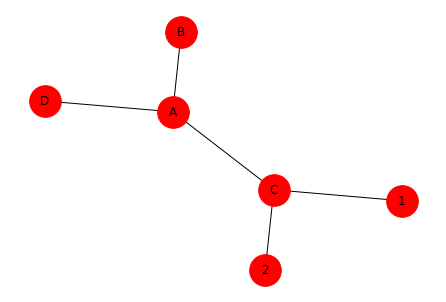

In [40]:
import pandas as pd
#fig, ax = plt.subplots(figsize=(15, 8))

relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2'], 
                              'to':   ['B', 'C', 'D', 'C', 'C']})
 
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Set node size
nx.draw(G, with_labels=True, node_size=1000, node_color='r')

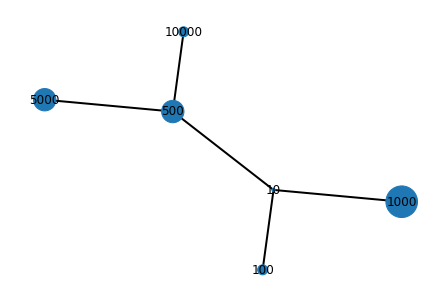

In [42]:
#Manual Node Size and edge width
relationships = pd.DataFrame({'from': ['10', '10', '10', '5000', '10000'], 
                              'to':   ['100', '500', '1000', '500', '500']})

# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Manually set each nodes size
node_sizes = [10, 100, 500, 1000, 500, 100]

# Draw graph
nx.draw(G, with_labels=True, node_size=node_sizes,width=2) #width is for edges

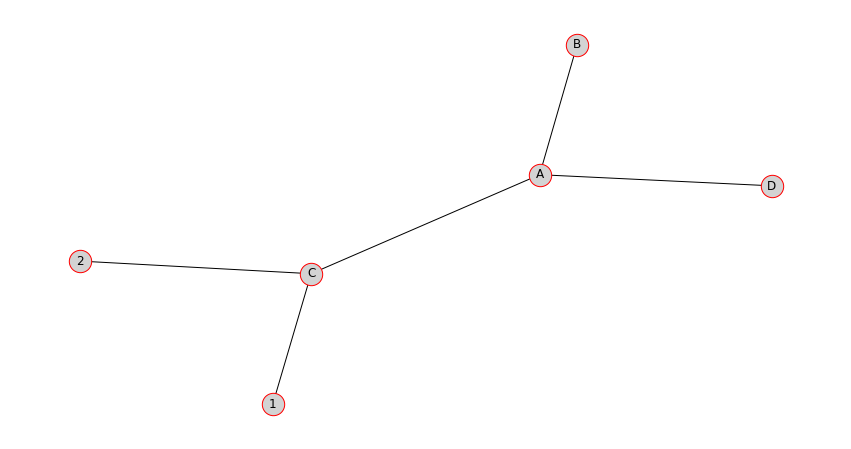

In [46]:
#Node Border Color
fig, ax = plt.subplots(figsize=(15, 8))

relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2'], 
                              'to':   ['B', 'C', 'D', 'C', 'C']})
 
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Set edgecolors and node_color and node_size for better visibility
nx.draw(G, with_labels=True, edgecolors='red', node_color='lightgray', node_size=500)

### Edge Attributes
Add/change edge attributes using add_edge(), add_edges_from(), or subscript notation.

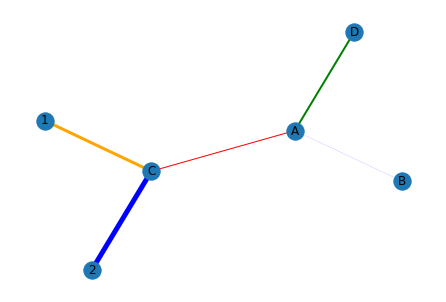

In [47]:
#Edge Color
relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2'], 
                              'to':   ['B', 'C', 'D', 'C', 'C']})
 
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Set edge colors
edge_colors = ['blue', 'red', 'green', 'orange', 'blue']

# Set edge widths
edge_widths = [0.1, 1, 2, 3, 5]

# Set width and edge_color
nx.draw(G, with_labels=True, width=edge_widths, edge_color=edge_colors)

[('A', {}), ('B', {}), ('C', {}), ('D', {}), ('1', {}), ('2', {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {})]
{'color': 'red', 'weight': 4.2}


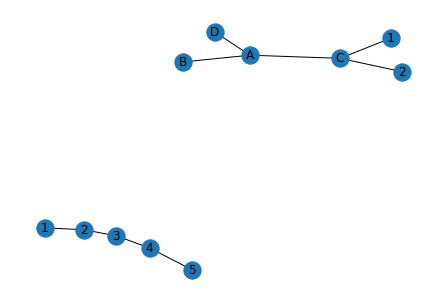

In [57]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.nodes.data())
nx.draw(G,with_labels=True)
print(G.edges[3,4]) #(3,4) ki sari info of the attributes show hojayegi, aise baaki edges ki bhi karaskte ha

In [58]:
# The following line initializes two empty directed graph objects
G1=nx.DiGraph()

# An empty undirected graph object can be initialized using the command
# G=nx.Graph()
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)
G1.add_node(6)
G1.nodes()
list_nodes = [1, 2, 3, 4, 5, 6]

#add weights Let us now add the arcs. As with nodes, 
G1.add_edge(1, 2, weight = 2.0)
G1.add_edge(1,3)
G1.add_edge(1,3,weight = 4.0)
G1.add_edge(2, 3, weight = 1.0)
G1.add_edge(2, 4, weight = 4.0)
G1.add_edge(2, 5, weight = 2.0)
#G1.add_edge(3, 5)
#G1.edge[3][5]['weight'] = 3.0
G1.add_edge(4, 6, weight = 2.0)
G1.add_edge(5, 4, weight = 3.0)
G1.add_edge(5, 6, weight = 2.0)
G1.edges()
#
#list_arcs = [(1,2,2.0) , (1,3,4.0) , (2,3,1.0) , (2,4,4.0) , (2,5,2.0) , (3,5,3.0) , (4,6,2.0) , (5,4,3.0) , (5,6,2.0)]

# We then set the coordinates of each node
G1.node[1]['pos'] = (0,0)
G1.node[2]['pos'] = (2,2)
G1.node[3]['pos'] = (2,-2)
G1.node[4]['pos'] = (5,2)
G1.node[5]['pos'] = (5,-2)
G1.node[6]['pos'] = (7,0)

# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G1,'pos')

# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G1,'weight')

nx.draw_networkx(G1, node_pos,node_color= 'r', node_size=450)

# Draw the edges
nx.draw_networkx_edges(G1, node_pos,edge_color='y')

# Draw the edge labels
nx.draw_networkx_edge_labels(G1, node_pos,edge_color='r', edge_labels=arc_weight)  # edge_labels is used to set the label of each edge
#edge_labels=arc_weight  for label of an edge

# Remove the axis
plt.axis('off')

# Show the plot
plt.show()

AttributeError: 'Graph' object has no attribute 'node'

### Directed graphs
The DiGraph class provides additional methods and properties specific to directed edges, e.g., DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() is equivalent to successors() while degree reports the sum of in_degree and out_degree even though that may feel inconsistent at times.

0.5

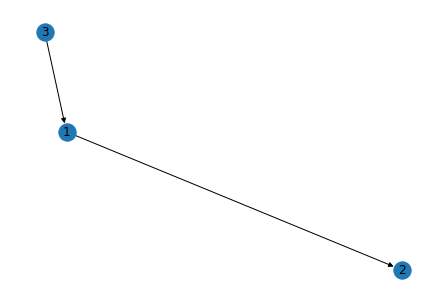

In [62]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
nx.draw(DG,with_labels=True)
DG.out_degree(1, weight='weight')

In [63]:
DG.degree(1, weight='weight') #0.75+0.5 = 1.25

1.25

In [64]:
list(DG.successors(1)) #successor means 1 se bahar jaane valo ka naam

[2]

In [27]:
list(DG.neighbors(1))

[3, 2]

In [67]:
# If you want to treat a directed graph as undirected for some measurement you should probably
#convert it using Graph.to_undirected() or
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

### Multigraphs
NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., MultiGraph.degree() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

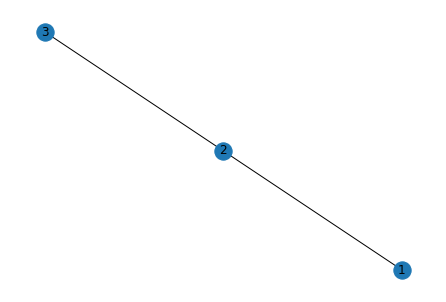

In [70]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))
{1: 1.25, 2: 1.75, 3: 0.5}
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)
nx.draw(GG,with_labels=True)

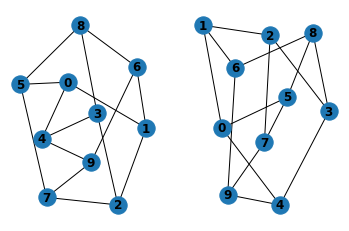

In [30]:
#The Petersen graph is an undirected graph with ten vertices and fifteen edges
import matplotlib.pyplot as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(G, with_labels=True, font_weight='bold')
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold') #shell se star banega in the grph

None


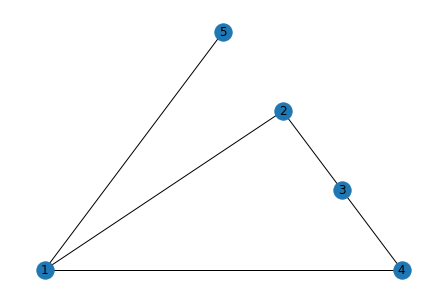

In [89]:
g = nx.Graph()
 
g.add_edge(1, 2, label='1')
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)
#print(nx.draw(g, with_labels = True))

# drawing in circular layout
#print(nx.draw_circular(g, with_labels = True))
 
# drawing in planar layout
print(nx.draw_planar(g, with_labels = True))

In [90]:
# clearing the current plot
#plt.clf()

<Figure size 432x288 with 0 Axes>

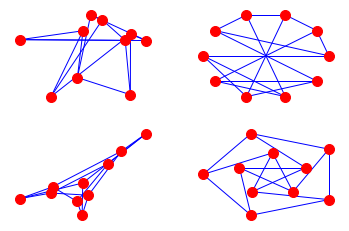

In [31]:
options = {
    'node_color': 'red',
    'node_size': 100,
    'width': 1,
    'edge_color' : 'b'
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options) #** se value fetch hogi from dictionary
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

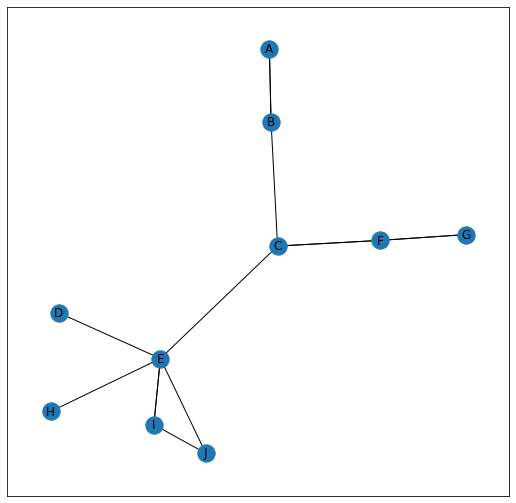

In [93]:
G = nx.MultiGraph()
relations = [('A', 'B', 'neighbour'), ('A', 'B', 'friend'), ('B', 'C', 'coworker'),
             ('C', 'F', 'coworker'), ('C', 'F', 'friend'), ('F', 'G', 'coworker'),
             ('F', 'G', 'family'), ('C', 'E', 'friend'), ('E', 'D', 'family'),
             ('E', 'I', 'coworker'), ('E', 'I', 'neighbour'), ('I', 'J', 'coworker'),
             ('E', 'J', 'friend'), ('E', 'H', 'coworker')]
  
for i in relations:
    G.add_edge(i[0], i[1], relation = i[2])
      
plt.figure(figsize =(9, 9))
nx.draw_networkx(G, with_labels = True)

(0.42210125774145124,
 0.5248713210225106,
 0.042598613910377024,
 0.3862562203779817)

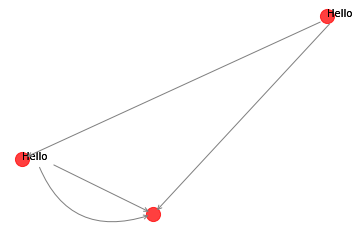

In [94]:
G=nx.MultiGraph ([(1,2),(1,2),(3,1),(3,2)])
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 200, alpha = 0.75) #alpha for brightness
ax = plt.gca()

for e in G.edges:
    ax.annotate("Hello",
                xy=pos[e[0]], 
                xytext=pos[e[1]], 
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5, 
                                connectionstyle="arc3,rad=rr".replace('rr',str(0.5*e[2])
                                ),
                                ),
                )
plt.axis('off')


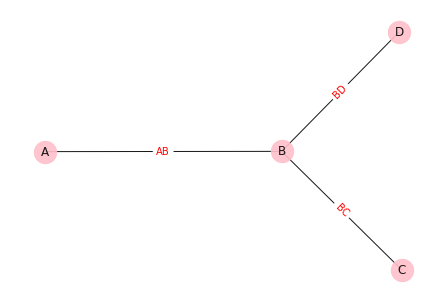

In [97]:
edges = [['A', 'B'], ['B', 'C'], ['B', 'D']]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={('A', 'B'): 'AB', 
                 ('B', 'C'): 'BC', 
                 ('B', 'D'): 'BD'},
    font_color='red'
)
plt.axis('off')
plt.show()